# SALES PREDICTION USING Scikit-Learn, PANDAS AND NUMPY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('Documents/Advertising.csv')
print(data.shape)
print(data.columns)
type(data)

data.head()
#we have to predict sales

(200, 5)
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
data.isna().sum() # finding the count of missing values in columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

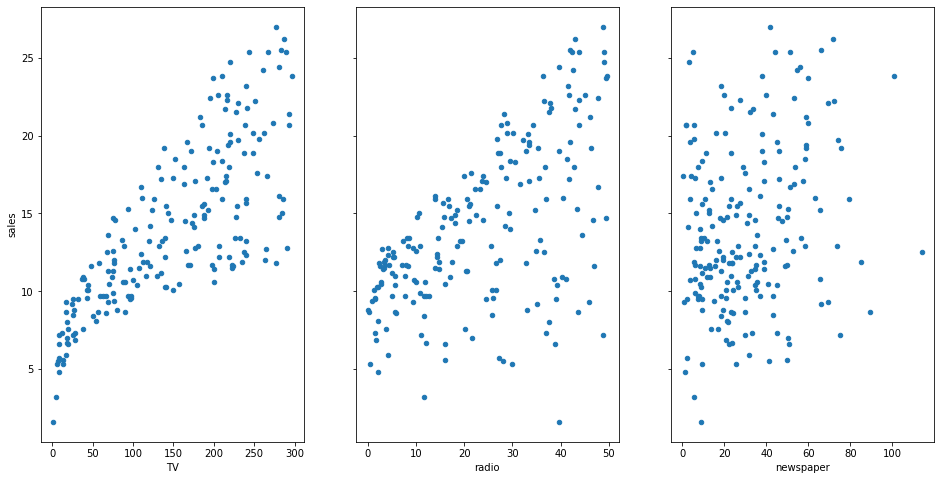

In [5]:
# visualize the relationship between features and response using scatterplot

fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


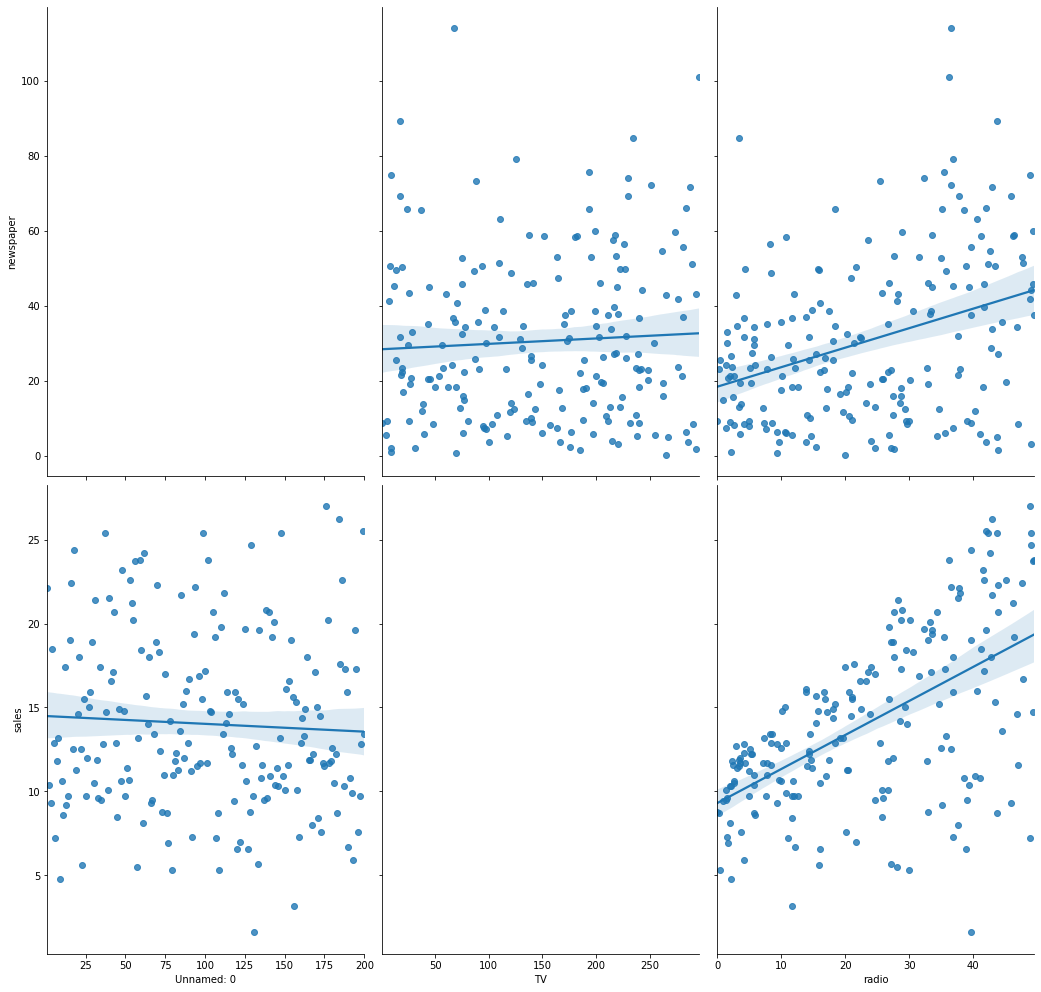

In [6]:
#plotting realtonship to understand relationship between features and result
sns.pairplot(data,x_vars=data.columns[:3],y_vars=data.columns[3:],size=7,aspect=0.7,kind='reg')


In [7]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [8]:
# create x = feature and y = label
   
x = data[['TV']]
y = data.sales
        
 # follow the user sklearn pattern: import , instantiate , fit

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x,y)

 
 

LinearRegression()

In [9]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127694
[0.04753664]


In [10]:
# prediction

x_new = pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [11]:
# use the model to make predictions on a new value

lm.predict(x_new)

array([9.40942557])

In [12]:
feature_cols=data.columns[:3]
#feature_cols = ['TV','radio','newspaper']   
X=data[feature_cols]

result_cols= data.columns[3:]
#result_cols= ['sales']
Y=data[result_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 3)
(120, 2)
(80, 3)
(80, 2)


In [13]:
lnrg = LinearRegression()
lnrg.fit(x_train,y_train)

#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)


linear regression bias or intercept   =>  [23.8347454   2.61695737]
linear regression coefficient         =>  [[-0.06256174  0.01432246  0.54404777]
 [-0.0008861   0.04760636  0.19137156]]
feature columns                       =>  Index(['Unnamed: 0', 'TV', 'radio'], dtype='object')


In [14]:
y_hat = lnrg.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )

#the less score the better

13.72192022576572


In [15]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6975826995001906

In [16]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.705763518314251

In [17]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.933906818968269

In [18]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.9645311543544213

In [19]:
# cross validation. to get best feature
#all features
feature_cols = ['TV','radio','newspaper']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051797


In [20]:
# with some features
feature_cols = ['TV','radio']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090766
